# Sizov Denis 17PI

## Лабораторная работа №2. RecSys

### Описание

В рамках данной лабораторной работы нам предстоит решить задачу рекомендательной системы книг на основе следующих данных:

1. **ratings** - рейтинги книг по 10 бальной шкале
* **itmes** - описание items
* **users** - описание user

Скачать данные можно здесь http://www2.informatik.uni-freiburg.de/~cziegler/BX/

### Загрузка

Загружаем полные данные

In [0]:
import pandas as pd
from pathlib import Path

Устанавливаем процент данных, с которыми будем работать, для теста используем 10%, так как больше приводит к долгим вычислениям

In [0]:
PERCENT_REDACTION = 15

In [0]:
DATA_PATH = Path('./BX-CSV-Dump/')

In [4]:
list(DATA_PATH.glob('*'))

[PosixPath('BX-CSV-Dump/BX-Books.csv'),
 PosixPath('BX-CSV-Dump/BX-Users.csv'),
 PosixPath('BX-CSV-Dump/BX-Book-Ratings.csv')]

In [5]:
ratings = pd.read_csv(DATA_PATH / 'BX-Book-Ratings.csv', sep=';', decimal = ',', 
                      quotechar='"', encoding = 'cp1251', comment = "'")
print(ratings.shape)
ratings.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
books = pd.read_csv(DATA_PATH / 'BX-Books.csv', sep=';', decimal = ',', error_bad_lines=False,
                      quotechar='"', encoding = 'cp1251', comment = "'")
print(books.shape)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


(271360, 8)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
books = books.head(int(books.shape[0]*PERCENT_REDACTION/100))
print(books.shape)
books.head()

(40704, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
user = pd.read_csv(DATA_PATH / 'BX-Users.csv', sep=';', quotechar='"', encoding = 'cp1251')
print(user.shape)

(278858, 3)


In [9]:
user = user.head(int(user.shape[0]*PERCENT_REDACTION/100))
print(user.shape)
user.head()

(41828, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
need_user = user['User-ID'].values.tolist()
need_books = books['ISBN'].values.tolist()
ratings = ratings[ratings['User-ID'].isin(need_user)]
ratings = ratings[ratings['ISBN'].isin(need_books)]
ratings

,User-ID,ISBN,Book-Rating
9561,2,0195153448,0
9563,8,0002005018,5
9564,8,0060973129,0
9565,8,0374157065,0
9566,8,0393045218,0
...,...,...,...
189767,41808,0804114986,6
189770,41811,0451203771,9
189771,41812,0373484046,0
189772,41814,0140366784,8


In [0]:
user.to_csv(f'users{PERCENT_REDACTION}.csv', sep=';', quotechar='"', encoding = 'cp1251', index=False)
books.to_csv(f'books{PERCENT_REDACTION}.csv', sep=';',  quotechar='"', encoding = 'cp1251', index=False)
ratings.to_csv(f'ratings{PERCENT_REDACTION}.csv', sep=';', quotechar='"', encoding = 'cp1251', index=False)

Теперь можно использовать сохраненные данные до 10% (или до другого процента, выбранного ранее)

In [12]:
ratings = pd.read_csv(f'ratings{PERCENT_REDACTION}.csv', sep=';', decimal = ',', 
                      quotechar='"', encoding = 'cp1251', comment = "'")
print(ratings.shape)
ratings.head()

(110897, 3)


,User-ID,ISBN,Book-Rating
0,2,0195153448,0
1,8,0002005018,5
2,8,0060973129,0
3,8,0374157065,0
4,8,0393045218,0


In [13]:
books = pd.read_csv(f'books{PERCENT_REDACTION}.csv', sep=';', decimal = ',', error_bad_lines=False,
                      quotechar='"', encoding = 'cp1251', comment = "'")
print(books.shape)
books.head()

(40704, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D,NaN,NaN,NaN,NaN,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [14]:
users = pd.read_csv(f'users{PERCENT_REDACTION}.csv', sep=';', quotechar='"', encoding = 'cp1251')
print(users.shape)
users.head()

(41828, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Exploratory analysis:


In [0]:
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots

#### Распределение числа пользователей по количеству взаимодействий

In [0]:
count_time_user_stats = ratings.groupby('User-ID')['Book-Rating'].count() 
count_time_user_stats.name = 'count'
count_time_user_stats = count_time_user_stats.reset_index()
count_time_user_stats = count_time_user_stats.groupby('count')['User-ID'].count()
count_time_user_stats.name = 'users'
count_time_user_stats = count_time_user_stats.reset_index()

In [17]:
count_time_user_stats.head()

,count,users
0,1,6748
1,2,1454
2,3,766
3,4,492
4,5,355


In [18]:
count_time_user_stats.shape

(231, 2)

In [19]:
fig = px.histogram(count_time_user_stats, x="count", y="users",
                   title = 'Count ratings stats')
fig.show()

#### Разпределение числа "айтемов" по количеству взаимодействий

In [0]:
count_time_book_stats = ratings.groupby('ISBN')['Book-Rating'].count() 
count_time_book_stats.name = 'count'
count_time_book_stats = count_time_book_stats.reset_index()
count_time_book_stats = count_time_book_stats.groupby('count')['ISBN'].count()
count_time_book_stats.name = 'books'
count_time_book_stats = count_time_book_stats.reset_index()

In [21]:
count_time_book_stats.head()

,count,books
0,1,22534
1,2,7689
2,3,3435
3,4,1957
4,5,1205


In [22]:
fig = px.bar(count_time_book_stats, x="count", y="books",
                   title = 'Count ratings stats')
fig.show()

#### Распределение числа рейтингов, средних рейтингов по пользователям, по "айтемам"

In [0]:
stats_user = ratings.groupby('User-ID')['Book-Rating'].agg([np.mean, np.median, max, min, len])

In [24]:
stats_user.head()

,mean,median,max,min,len
User-ID,,,,,
2,0.000000,0.0,0,0,1
8,2.294118,0.0,7,0,17
9,2.000000,0.0,6,0,3
10,0.000000,0.0,0,0,1
12,10.000000,10.0,10,10,1


In [25]:
fig1 = px.histogram(stats_user, x="mean", y="len", title = 'Mean rating distribution')
fig2 = px.histogram(stats_user, x="median", y="len", title = 'Median rating distribution')
trace1 = fig1['data'][0]
trace2 = fig2['data'][0]

fig = make_subplots(rows=1, cols=2, shared_xaxes=False)
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

In [0]:
stats_books = ratings.groupby('ISBN')['Book-Rating'].agg([np.mean, np.median, max, min, len])

In [27]:
stats_books.head()

,mean,median,max,min,len
ISBN,,,,,
0001047973,9.0,9.0,9,9,2
0001360469,10.0,10.0,10,10,1
0001372564,0.0,0.0,0,0,1
0001374869,10.0,10.0,10,10,1
0001714600,0.0,0.0,0,0,1


In [28]:
fig1 = px.histogram(stats_books, x="mean", y="len", title = 'Mean rating distribution')
fig2 = px.histogram(stats_books, x="median", y="len", title = 'Median rating distribution')
trace1 = fig1['data'][0]
trace2 = fig2['data'][0]

fig = make_subplots(rows=1, cols=2, shared_xaxes=False)
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

#### Распределение количества книг по дате публикации и пользователей по возрасту

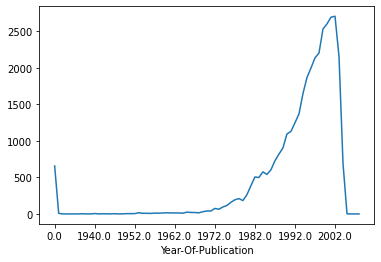

In [29]:
books.groupby('Year-Of-Publication')['ISBN'].count().plot()

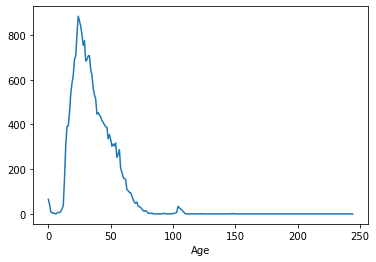

In [30]:
users.groupby('Age')['User-ID'].count().plot()

#### Выводы по графикам

1.   Большинство книг имеет только по 1 оценке, большинство пользователей ставили только 1 оценку. Таким данным нельзя доверять, их нужно убирать. Более того все, кто ставил мало оценок не может считаться компетентным и влиять на результаты.
2.   Средняя оценка по пользователям и по книгам, колеблется в районе 8. На самом деле из этого можно сделать интересный вывод о подсознании человека. Большинство людей не любит ставить 9-10, так как всегда думают: "а вдруг будет что-то лучше", даже многие преподаватели ВШЭ не ставят 10, потому что "идеала не существует". Поэтому средняя 10 логичная оценка. 
3. Мы видим много нулей, но это структура датасета, затронется дальше
4. Целевая аудитория таких сервисов люди 30-40 лет, скачок на 105 годах вызывает удивление. Можно также сказать, что датасет устарел, потому что тут представлены оценки за книги до 2002 года, сейчас точно многое поменялось. По крайней мере системы рейтингов стали более популярнее и существуют во многих отраслях жизни, например IMDB по фильмам или BGG по настольным играм (сам пользуюсь всеми этими рейтингами).



### Разреженность данных по рейтингу

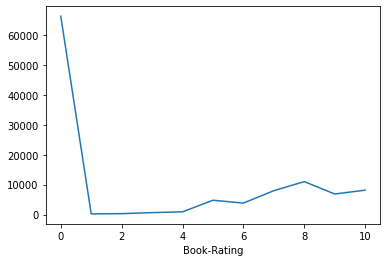

In [31]:
ratings.groupby('Book-Rating')['Book-Rating'].count().plot()

Разреженные данные - это данные, в которых вместо NULL-значений стоят нули. Большинство данных является нулями, значит данные являются разреженными. Это лучше чем потерянные, но у нас много нулей.

### Разделение данных на тренировочные и валидационные

Отрежем всех пользователей голосовавших 3 и менее раз, так как они не несут существенных данных

In [0]:
MIN_RATE = 10

In [0]:
ratings_filtered = ratings.groupby('User-ID').filter(lambda x: len(x)>=MIN_RATE)

In [0]:
train = pd.DataFrame()
test = pd.DataFrame()
for user in ratings_filtered['User-ID'].unique():
    temp_table = ratings_filtered[ratings_filtered['User-ID'] == user]
    cnt = temp_table.shape[0]
    size_train = round(cnt*0.7, 0)
    train = train.append(temp_table.sort_values('Book-Rating').iloc[:int(size_train),:])
    test = test.append(temp_table.sort_values('Book-Rating').iloc[int(size_train):,:])

In [35]:
print('dataset train ', train.shape[0], ' test', test.shape[0])
print('unique user in train', train['User-ID'].nunique(), 'test ', test['User-ID'].nunique())
print('cold-user in the test ', test['User-ID'].nunique() - test[test['User-ID'].isin(train['User-ID'])]['User-ID'].nunique())

dataset train  62433  test 26793
unique user in train 1405 test  1405
cold-user in the test  0


In [36]:
print('unique books in train', train['ISBN'].nunique(), 'test ', test['ISBN'].nunique())
print('cold-item in the test ', test['ISBN'].nunique() - test[test['ISBN'].isin(train['ISBN'])]['ISBN'].nunique())

unique books in train 29528 test  15714
cold-item in the test  6643


In [0]:
cold_users = [i for i in test['User-ID'].unique() if i not in train['User-ID'].unique()]
cold_items = [i for i in test['ISBN'].unique() if i not in train['ISBN'].unique()]

### Задачу на основе коллоборативной фильтрации, используя SVD

In [38]:
! pip install scikit-surprise

In [0]:
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import cross_validate
import os

In [40]:
train = train.reset_index()
train = train.drop(columns=['index'], axis=0)
train.rename(columns={'User-ID': 'userId', 'ISBN': 'bookId', 'Book-Rating': 'rating'}, inplace=True)
train.head()

,userId,bookId,rating
0,8,0060973129,0
1,8,0374157065,0
2,8,0393045218,0
3,8,0399135782,0
4,8,0425176428,0


In [41]:
test = test.reset_index()
test = test.drop(columns=['index'], axis=0)
test.rename(columns={'User-ID': 'userId', 'ISBN': 'bookId', 'Book-Rating': 'rating'}, inplace=True)
test.head()

,userId,bookId,rating
0,8,074322678X,5
1,8,0887841740,5
2,8,1575663937,6
3,8,1567407781,6
4,8,1881320189,7


In [0]:
train_sup = Dataset.load_from_df(train.iloc[:, :],  reader=Reader(line_format='user item rating'))
test_sup = Dataset.load_from_df(test.iloc[:, :],  reader=Reader(line_format='user item rating'))

In [0]:
svd = SVD(random_state=0, n_factors=10, n_epochs=30, verbose=True)

In [0]:
train_sup = train_sup.build_full_trainset()

In [45]:
svd.fit(train_sup)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29


In [0]:
def predict(
    algo,
    data,
    usercol,
    itemcol,
    predcol,
):
    predictions = [
        algo.predict(getattr(row, usercol), getattr(row, itemcol))
        for row in data.itertuples()
    ]
    predictions = pd.DataFrame(predictions)
    predictions = predictions.rename(
        index=str, columns={"uid": usercol, "iid": itemcol, "est": predcol}
    )
    return predictions.drop(["details", "r_ui"], axis="columns")

In [47]:
predictions = predict(svd, test, usercol='userId', itemcol='bookId', predcol='pred')
predictions.head()

,userId,bookId,pred
0,8,074322678X,1.0
1,8,0887841740,1.0
2,8,1575663937,1.0
3,8,1567407781,1.0
4,8,1881320189,1.0


In [0]:
def compute_ranking_predictions(
    algo,
    data,
    usercol,
    itemcol,
    predcol,
    remove_seen=False,
):
    preds_lst = []
    for user in data[usercol].unique():
        for item in data[itemcol].unique():
            preds_lst.append([user, item, algo.predict(user, item).est])

    all_predictions = pd.DataFrame(data=preds_lst, columns=[usercol, itemcol, predcol])

    if remove_seen:
        tempdf = pd.concat(
            [
                data[[usercol, itemcol]],
                pd.DataFrame(
                    data=np.ones(data.shape[0]), columns=["dummycol"], index=data.index
                ),
            ],
            axis=1,
        )
        merged = pd.merge(tempdf, all_predictions, on=[usercol, itemcol], how="outer")
        return merged[merged["dummycol"].isnull()].drop("dummycol", axis=1)
    else:
        return all_predictions

In [0]:
all_predictions = compute_ranking_predictions(svd, 
                                              train, 
                                              usercol='userId', itemcol='bookId', predcol='pred', remove_seen=True)

In [50]:
all_predictions.head()

,userId,bookId,pred
62433,8,0316973742,1.000000
62434,8,067976397X,1.198986
62435,8,0684822733,1.000000
62436,8,0786868716,1.000000
62437,8,0451166892,1.000000


In [0]:
all_predictions_final = all_predictions.sort_values(by='pred', ascending=False).groupby(['userId'])['bookId'].apply(lambda x: list(x)).to_frame().reset_index()

In [52]:
all_predictions_final

,userId,bookId
0,8,"[0380789019, 0399148027, 0451147960, 006109398..."
1,99,"[0380789019, 0399148027, 1563899388, 045114796..."
2,242,"[3257215436, 3257231008, 0871131943, 044639536..."
3,243,"[0375756981, 0060199652, 0380816555, 156389938..."
4,254,"[0380789019, 0425175111, 0380816555, 042514755..."
...,...,...
1400,41701,"[006109398X, 0425175111, 0380789019, 038081655..."
1401,41718,"[0380789019, 0060199652, 0375756981, 039915085..."
1402,41757,"[0380789019, 0060199652, 0312983220, 052594593..."
1403,41760,"[0375756981, 0380789019, 006109398X, 042514755..."


In [0]:
ranking_df = test.merge(train, on = ['userId', 'bookId'], how='left', suffixes=('', '_TrainRating'))
ranking_df['cold_users'] = ranking_df.userId.map(lambda x: x in cold_users)
ranking_df['cold_items'] = ranking_df.bookId.map(lambda x: x in cold_items)

In [54]:
ranking_df.head()

,userId,bookId,rating,rating_TrainRating,cold_users,cold_items
0,8,074322678X,5,NaN,False,True
1,8,0887841740,5,NaN,False,True
2,8,1575663937,6,NaN,False,True
3,8,1567407781,6,NaN,False,True
4,8,1881320189,7,NaN,False,False


In [55]:
ranking_df.cold_items.value_counts()

False    19259
True      7534
Name: cold_items, dtype: int64

In [56]:
ranking_df.cold_users.value_counts()

False    26793
Name: cold_users, dtype: int64

In [57]:
ranking_df_final = ranking_df[(ranking_df.cold_items==False)&(ranking_df.cold_users==False)&(ranking_df.rating_TrainRating.isnull())]
ranking_df_final = ranking_df_final.groupby(['userId'])['bookId'].apply(lambda x: list(x)).to_frame().reset_index()
ranking_table = ranking_df_final.merge(all_predictions_final, on = ['userId'], 
                                       how='left', suffixes=('_gt', '_pred'))
ranking_table.head()

,userId,bookId_gt,bookId_pred
0,8,[1881320189],"[0380789019, 0399148027, 0451147960, 006109398..."
1,99,"[0312261594, 0446677450]","[0380789019, 0399148027, 1563899388, 045114796..."
2,242,[0553278223],"[3257215436, 3257231008, 0871131943, 044639536..."
3,243,"[038076654X, 0380807866, 0671042572, 051513038...","[0375756981, 0060199652, 0380816555, 156389938..."
4,254,"[0060934719, 0060930535, 0380789019, 006039144...","[0380789019, 0425175111, 0380816555, 042514755..."


In [0]:
ranking_table['top_3'] = ranking_table.apply(lambda x: [int(pred in x.bookId_gt) for pred in x.bookId_pred[:3]], axis=1)
ranking_table['top_5'] = ranking_table.apply(lambda x: [int(pred in x.bookId_gt) for pred in x.bookId_pred[:5]], axis=1)
ranking_table['top_10'] = ranking_table.apply(lambda x: [int(pred in x.bookId_gt) for pred in x.bookId_pred[:10]], axis=1)

In [59]:
ranking_table.head()

,userId,bookId_gt,bookId_pred,top_3,top_5,top_10
0,8,[1881320189],"[0380789019, 0399148027, 0451147960, 006109398...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,99,"[0312261594, 0446677450]","[0380789019, 0399148027, 1563899388, 045114796...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,242,[0553278223],"[3257215436, 3257231008, 0871131943, 044639536...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,243,"[038076654X, 0380807866, 0671042572, 051513038...","[0375756981, 0060199652, 0380816555, 156389938...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,254,"[0060934719, 0060930535, 0380789019, 006039144...","[0380789019, 0425175111, 0380816555, 042514755...","[1, 0, 0]","[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


### Metrics

Введем метрики для оценки качества алгоритма ранжирования. Будем использовать MRR (Mean reciprocal rank) и MAP@K (Mean average precision at K). Но в остновном смотрим на MAP@K, так как она самая популярная из всех.

In [0]:
def mean_reciprocal_rank(rs):
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs])


def r_precision(r):
    r = np.asarray(r) != 0
    z = r.nonzero()[0]
    if not z.size:
        return 0.
    return np.mean(r[:z[-1] + 1])


def precision_at_k(r, k):
    assert k >= 1
    r = np.asarray(r)[:k] != 0
    if r.size != k:
        raise ValueError('Relevance score length < k')
    return np.mean(r)


def average_precision(r):
    r = np.asarray(r) != 0
    out = [precision_at_k(r, k + 1) for k in range(r.size) if r[k]]
    if not out:
        return 0.
    return np.mean(out)


def mean_average_precision(rs):
    return np.mean([average_precision(r) for r in rs])


def dcg_at_k(r, k, method=0):
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
        else:
            raise ValueError('method must be 0 or 1.')
    return 0.


def ndcg_at_k(r, k, method=0):
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

In [0]:
score_results_svd = pd.DataFrame(index=['top_3', 'top_5', 'top_10'], columns=['MRR', 'MAP@K'])

In [0]:
for top in [3, 5, 10]:
    score_results_svd.loc['top_'+str(top), 'MAP@K'] = mean_reciprocal_rank(list(ranking_table['top_'+str(top)].values))
    score_results_svd.loc['top_'+str(top), 'MRR'] = mean_average_precision(list(ranking_table['top_'+str(top)].values))

In [63]:
score_results_svd

,MRR,MAP@K
top_3,0.00492005,0.00492005
top_5,0.00617466,0.00617466
top_10,0.00780443,0.00776489


### Задача на основе предложения всем юзерам наиболее популярных item

In [64]:
list(train.groupby('bookId')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)['bookId'][:10].values)

['059098182X',
 '0856485853',
 '0517881004',
 '0849935369',
 '0449232131',
 '0062731025',
 '0849976162',
 '006057898X',
 '085648492X',
 '0856484938']

In [0]:
ranking_table['most_popular'] = 1

In [0]:
ranking_table['most_popular'] = ranking_table['most_popular'].map(lambda x: list(train.groupby('bookId')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)['bookId'][:10].values))

In [67]:
ranking_table.head()

,userId,bookId_gt,bookId_pred,top_3,top_5,top_10,most_popular
0,8,[1881320189],"[0380789019, 0399148027, 0451147960, 006109398...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[059098182X, 0856485853, 0517881004, 084993536..."
1,99,"[0312261594, 0446677450]","[0380789019, 0399148027, 1563899388, 045114796...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[059098182X, 0856485853, 0517881004, 084993536..."
2,242,[0553278223],"[3257215436, 3257231008, 0871131943, 044639536...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[059098182X, 0856485853, 0517881004, 084993536..."
3,243,"[038076654X, 0380807866, 0671042572, 051513038...","[0375756981, 0060199652, 0380816555, 156389938...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[059098182X, 0856485853, 0517881004, 084993536..."
4,254,"[0060934719, 0060930535, 0380789019, 006039144...","[0380789019, 0425175111, 0380816555, 042514755...","[1, 0, 0]","[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[059098182X, 0856485853, 0517881004, 084993536..."


In [0]:
ranking_table['top_3_mp'] = ranking_table.apply(lambda x: [int(pred in x.bookId_gt) for pred in x.most_popular[:3]], axis=1)
ranking_table['top_5_mp'] = ranking_table.apply(lambda x: [int(pred in x.bookId_gt) for pred in x.most_popular[:5]], axis=1)
ranking_table['top_10_mp'] = ranking_table.apply(lambda x: [int(pred in x.bookId_gt) for pred in x.most_popular[:10]], axis=1)

In [0]:
score_results_mp = pd.DataFrame(index=['top_3', 'top_5', 'top_10'], columns=['MRR', 'MAP@K'])

In [0]:
for top in [3, 5, 10]:
    score_results_mp.loc['top_'+str(top), 'MAP@K'] = mean_reciprocal_rank(list(ranking_table['top_'+str(top)+'_mp'].values))
    score_results_mp.loc['top_'+str(top), 'MRR'] = mean_average_precision(list(ranking_table['top_'+str(top)+'_mp'].values))

In [71]:
score_results_mp

,MRR,MAP@K
top_3,0.000738007,0.000738007
top_5,0.000738007,0.000738007
top_10,0.000843437,0.000843437


### Задачу на основе коллоборативной фильтрации, используя ALS

In [0]:
from scipy.sparse import csr_matrix

In [73]:
! pip install implicit

In [0]:
from implicit.als import AlternatingLeastSquares

In [75]:
ALS = AlternatingLeastSquares(num_threads=3)

GPU training requires factor size to be a multiple of 32. Increasing factors from 100 to 128.


In [76]:
train.head()

,userId,bookId,rating
0,8,0060973129,0
1,8,0374157065,0
2,8,0393045218,0
3,8,0399135782,0
4,8,0425176428,0


In [0]:
id2user = {key: value for key, value in enumerate(train.userId.unique())}
id2items = {key: value for key, value in enumerate(train.bookId.unique())} # Get our unique products that were purchased
rating = list(train.rating) # All of our purchases

In [0]:
user2id  = {value:key for key, value in id2user.items()}
items2id  = {value:key for key, value in id2items.items()}

In [0]:
rows = train.userId.map(user2id)
# Get the associated row indices
cols = train.bookId.map(items2id)
# Get the associated column indices

In [80]:
rating_sparse = csr_matrix((rating, (rows, cols)), shape=(len(user2id), len(items2id)))
rating_sparse

<1405x29528 sparse matrix of type '<class 'numpy.longlong'>'
	with 62433 stored elements in Compressed Sparse Row format>

In [81]:
ALS.fit(rating_sparse.T)

In [82]:
ALS.item_factors.shape

(29528, 128)

In [83]:
ALS.user_factors.shape

(1405, 128)

In [84]:
predict = ALS.recommend_all(rating_sparse, filter_already_liked_items=True)

In [85]:
print(predict.shape)
predict

(1405, 10)


array([[14035,  8983,  2955, ...,   638,  1764, 15958],
       [ 3993,   721,  7642, ...,  2670,  8988,  2708],
       [16877,  5281, 28712, ..., 28711, 28713, 15292],
       ...,
       [12443,  4119,  5170, ..., 26568, 17586, 13720],
       [ 8384,  1573,  3990, ...,  9701,  9350,  4751],
       [10793, 10762,   825, ..., 20447,  5304, 20512]], dtype=int32)

In [86]:
test.head()

,userId,bookId,rating
0,8,074322678X,5
1,8,0887841740,5
2,8,1575663937,6
3,8,1567407781,6
4,8,1881320189,7


In [0]:
test['cold_users'] = test.userId.map(lambda x: x in cold_users)
test['cold_items'] = test.bookId.map(lambda x: x in cold_items)

In [88]:
test_result = test[(test.cold_items==False)&(test.cold_users==False)]
test_result = test_result.groupby(['userId'])['bookId'].apply(lambda x: list(x)).reset_index()
test_result['bookId_pred'] = test_result.userId.map(lambda x: predict[user2id[x], :])
test_result['bookId_pred'] = test_result.bookId_pred.map(lambda x: [id2items[i] for i in x])
test_result.head()

,userId,bookId,bookId_pred
0,8,[1881320189],"[2070381404, 0452284449, 0060921145, 038079960..."
1,99,"[0312261594, 0446677450]","[0425178951, 0380723638, 0425183750, 038072164..."
2,242,[0553278223],"[3596259924, 3596224284, 3442430879, 344244235..."
3,243,"[038076654X, 0380807866, 0671042572, 051513038...","[0515130389, 0553578308, 0786868716, 014028009..."
4,254,"[0060934719, 0060930535, 0380789019, 006039144...","[0375727345, 0385335482, 0786868716, 031295304..."


In [0]:
test_result['top_3'] = test_result.apply(lambda x: [int(pred in x.bookId_pred[:3]) for pred in x.bookId[:3]], axis=1)
test_result['top_5'] = test_result.apply(lambda x: [int(pred in x.bookId_pred[:5]) for pred in x.bookId[:5]], axis=1)
test_result['top_10'] = test_result.apply(lambda x: [int(pred in x.bookId_pred[:10]) for pred in x.bookId[:10]], axis=1)

In [90]:
test_result.head(10)

,userId,bookId,bookId_pred,top_3,top_5,top_10
0,8,[1881320189],"[2070381404, 0452284449, 0060921145, 038079960...",[0],[0],[0]
1,99,"[0312261594, 0446677450]","[0425178951, 0380723638, 0425183750, 038072164...","[0, 0]","[0, 0]","[0, 0]"
2,242,[0553278223],"[3596259924, 3596224284, 3442430879, 344244235...",[0],[0],[0]
3,243,"[038076654X, 0380807866, 0671042572, 051513038...","[0515130389, 0553578308, 0786868716, 014028009...","[0, 0, 0]","[0, 0, 0, 1, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
4,254,"[0060934719, 0060930535, 0380789019, 006039144...","[0375727345, 0385335482, 0786868716, 031295304...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5,383,"[0312995423, 0142001740, 0425098109, 074341126...","[0345351525, 0142001740, 044022165X, 037572734...","[0, 1, 0]","[0, 1, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0]"
6,388,"[0060973897, 0452279690, 0553569058, 0449213773]","[0140298479, 0380789019, 0140293248, 006100029...","[0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]"
7,408,"[0843136685, 0590947257, 0553582682]","[0142001740, 044022165X, 0345351525, 038533548...","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]"
8,424,"[0671021001, 0425156842, 0452277337, 0805063897]","[2070381404, 0452284449, 1561797111, 038079960...","[0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]"
9,446,"[0060932759, 0060925000, 0061000280, 0486281965]","[2070381404, 0452284449, 038079960X, 156179711...","[0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]"


In [0]:
score_results_als = pd.DataFrame(index=['top_3', 'top_5', 'top_10'], columns=['MRR', 'MAP@K'])

In [0]:
for top in [3, 5, 10]:
    score_results_als.loc['top_'+str(top), 'MAP@K'] = mean_reciprocal_rank(list(test_result['top_'+str(top)].values))
    score_results_als.loc['top_'+str(top), 'MRR'] = mean_average_precision(list(test_result['top_'+str(top)].values))

In [93]:
score_results_als

,MRR,MAP@K
top_3,0.00578106,0.00578106
top_5,0.00942189,0.0096064
top_10,0.0170292,0.0171329


### Задача на основе контент-based подхода, на основание векторов с факторизационной матрицы

In [94]:
ALS.similar_users(45)

[(45, 0.9809999),
 (724, 0.6867473),
 (1188, 0.6824638),
 (296, 0.46503448),
 (1077, 0.4409369),
 (455, 0.4088966),
 (300, 0.40640855),
 (579, 0.39943376),
 (421, 0.3933254),
 (231, 0.3932952)]

In [0]:
_id = 0

In [96]:
[(id2items[item], score) for item, score in ALS.similar_items(_id)]

[('0060973129', 0.027474198),
 ('0395442370', 0.027472973),
 ('3548021026', 0.027472826),
 ('0380017997', 0.027472615),
 ('0340223030', 0.027472548),
 ('0553102222', 0.02747239),
 ('0439285542', 0.027472321),
 ('0812564375', 0.027472295),
 ('0425115291', 0.02747224),
 ('0789480735', 0.027472215)]

In [0]:
from implicit.nearest_neighbours import CosineRecommender

In [0]:
cos = CosineRecommender(K = 10)

In [99]:
last_books = train[train.rating>=3.0].sort_values(by = ['rating'], ascending=False).groupby('userId')['bookId', 'rating'].apply(lambda x: x.head(5)).reset_index()
last_books = last_books.drop(columns=['level_1'], axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [100]:
last_books.head()

,userId,bookId,rating
0,8,0002005018,5
1,8,1552041778,5
2,99,0312252617,8
3,99,0316748641,7
4,99,0385235941,6


In [101]:
cos.fit(ALS.item_factors)

In [0]:
last_books['rating'] = last_books['rating'].astype('float64')

In [0]:
imp_rating = list(last_books.rating)
rows = last_books.userId.map(user2id)
cols = last_books.bookId.map(items2id)
rating_sparse_last = csr_matrix((imp_rating, (rows, cols)), shape=(len(user2id), len(items2id)))

In [104]:
rating_sparse_last

<1405x29528 sparse matrix of type '<class 'numpy.float64'>'
	with 3842 stored elements in Compressed Sparse Row format>

In [105]:
test_result.head()

,userId,bookId,bookId_pred,top_3,top_5,top_10
0,8,[1881320189],"[2070381404, 0452284449, 0060921145, 038079960...",[0],[0],[0]
1,99,"[0312261594, 0446677450]","[0425178951, 0380723638, 0425183750, 038072164...","[0, 0]","[0, 0]","[0, 0]"
2,242,[0553278223],"[3596259924, 3596224284, 3442430879, 344244235...",[0],[0],[0]
3,243,"[038076654X, 0380807866, 0671042572, 051513038...","[0515130389, 0553578308, 0786868716, 014028009...","[0, 0, 0]","[0, 0, 0, 1, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
4,254,"[0060934719, 0060930535, 0380789019, 006039144...","[0375727345, 0385335482, 0786868716, 031295304...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [0]:
def predict_cos(model, user, rating):
    res = model.recommend(user, rating)
    return [i for i, k in res]

In [0]:
test_result['bookId_pred'] = test_result.userId.map(lambda x: predict_cos(cos, user2id[x], rating_sparse_last))

In [0]:
test_result['bookId_pred'] = test_result.bookId_pred.map(lambda x: [id2items[i] for i in x])

In [0]:
test_result['top_3'] = test_result.apply(lambda x: [int(pred in x.bookId_pred[:3]) for pred in x.bookId[:3]], axis=1)
test_result['top_5'] = test_result.apply(lambda x: [int(pred in x.bookId_pred[:5]) for pred in x.bookId[:5]], axis=1)
test_result['top_10'] = test_result.apply(lambda x: [int(pred in x.bookId_pred[:10]) for pred in x.bookId[:10]], axis=1)

In [110]:
test_result.head()

,userId,bookId,bookId_pred,top_3,top_5,top_10
0,8,[1881320189],"[0316910333, 0226424197, 0679422188, 087793625...",[0],[0],[0]
1,99,"[0312261594, 0446677450]","[067103619X, 0380725827, 0307082849, 059044973...","[0, 0]","[0, 0]","[0, 0]"
2,242,[0553278223],"[3257216416, 3570300099, 3499110695, 345321215...",[0],[0],[0]
3,243,"[038076654X, 0380807866, 0671042572, 051513038...",[],"[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,254,"[0060934719, 0060930535, 0380789019, 006039144...",[],"[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [0]:
score_results_cos = pd.DataFrame(index=['top_3', 'top_5', 'top_10'], columns=['MRR', 'MAP@K'])

In [0]:
for top in [3, 5, 10]:
    score_results_cos.loc['top_'+str(top), 'MAP@K'] = mean_reciprocal_rank(list(test_result['top_'+str(top)].values))
    score_results_cos.loc['top_'+str(top), 'MRR'] = mean_average_precision(list(test_result['top_'+str(top)].values))

In [113]:
score_results_cos

,MRR,MAP@K
top_3,0.00098401,0.00098401
top_5,0.00303813,0.00297663
top_10,0.00506765,0.00500615


### Сравнение метрик

In [114]:
print(f'SVD\n {score_results_svd}')
print(f'Most popular\n {score_results_mp}')
print(f'ALS\n {score_results_als}')
print(f'Content-based\n {score_results_cos}')

SVD
                MRR       MAP@K
top_3   0.00492005  0.00492005
top_5   0.00617466  0.00617466
top_10  0.00780443  0.00776489
Most popular
                 MRR        MAP@K
top_3   0.000738007  0.000738007
top_5   0.000738007  0.000738007
top_10  0.000843437  0.000843437
ALS
                MRR       MAP@K
top_3   0.00578106  0.00578106
top_5   0.00942189   0.0096064
top_10   0.0170292   0.0171329
Content-based
                MRR       MAP@K
top_3   0.00098401  0.00098401
top_5   0.00303813  0.00297663
top_10  0.00506765  0.00500615


### Выводы и заключение

Прогнав всю программу несколько раз на различных параметрах, можно сделать выводы:
1.   чем больше данных в начале берешь, тем лучше (очень логичный вывод)
2.   фильтровать нужно, иначе в данные попадает множество оценок, которым нельзя доверять и все метрики становятся гораздо хуже, вот примеры:
*   [с фильтрацией](https://drive.google.com/file/d/1hzwvCvifqteGCwI8T-z3-9C0EhJ72ogK/view?usp=sharing)
*   [без фильтрации](https://drive.google.com/file/d/1hzwvCvifqteGCwI8T-z3-9C0EhJ72ogK/view?usp=sharing)





Сравнивая способы нахождения рекомендация можно сказать, что лучшим в этом отношении методом является ALS. Он показывает лучшие показатели по всем метрикам, по всем параметрам. Базирующийся на контенте подход и SVD показывают схожие результаты. Всех хуже работает подход, выводящий самые популярные книги. Скорее всего это можно объяснить тем, что самые любимые книги человека вряд ли являются самыми популярными. Да эти книги будут иметь хорошую оценку, но не самую высокую. Аналогию пожно провести с сайтом кинопоиск. Я не думаю, что самые популярные фильмы "Побег из Шоушенка" и "Зеленая миля" имеют у всех пользователей оценку 10. Оценки на эти фильмы у всех 8-9, но редко 10. Можно сделать пафосный вывод, что все люди индивидуальны и любят разные вещи. Итог: ALS больше всего подходит для данной рекомендационной системы.


Из-за недостатка мощностей максимум, который удалось посчитать это 15% данных (при 20 уже вылетало). Для достижения хороших показателей, нужно увеличивать мощности. Но я считаю, что поставленная задача была решена. И даже с такими небольшими объемами данных, получилось найти какие-либо рекомендации. И по факту, рекомендационная система создана, достаточно просто взять выданные фильмы и порекомендовать их пользователю.


P.S. спасибо за курс!)